The Use-Case considered for this project is to see the probability of a patient getting a Stroke and to analyze the causal relationships or factors leading to a person getting a stroke. The problem statement involves the use of Machine Learning Algorithms in solving this Business Problem. The dataset was sourced from an Analytics Vidhya Hackathon hosted by McKinsey. 

The Variables that are available for modeling purpose are as below :

        1) Gender - Whether the Patient is a Male/Female
        2) Age - Age of the patient
        3) Hypertension - Whether the Patient has Hypertension or not
        4) Heart Disease - Whether the Patient has Heart Disease or not
        5) Work Type - The Type of work the Patient is engaged in 
        6) Residence Type - The place the Patient resides in
        7) Average Glucose Level - The Average Glucose Level of the Patient
        8) BMI - Body Mass Index of the Patient
        9) Smoking Status - Whether the Patient has smoking habit or not
        

       

In [ ]:
#Load all the necessary packages
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [ ]:
#Loading the Dataset for the Training Dataset and the Testing Dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
#Studying the Training Dataset
print(train_data.describe())

                 id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.07

In [ ]:
train_data.shape

(43400, 12)

The Training Dataset has about 43400 Patient level details and 12 Variables.  

In [ ]:
test_data.shape

(18601, 11)

The Testing Dataset has about 18601 Patient level details and 11 variables. 

Now, joining the training and the testing dataset to perform feature engineering, data transformation, missing value imputation and outlier treatment activities

In [ ]:
input_data = train_data.append(test_data, ignore_index=True,sort=False)

Now, checking for the datatypes and make corrections to the datatype if they aren't in their respective datatypes

In [ ]:
input_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke               float64
dtype: object

Removing "ID" Variable since it cannot be used for Modeling Purpose

In [ ]:
input_data = input_data.drop(['id'], axis=1)

 Checking for missing values in the Dataset and treat them accordingly. 

In [ ]:
print(input_data.isnull().sum())

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   2053
smoking_status       19043
stroke               18601
dtype: int64


There are 2053 missing values for the Variable "BMI" and 19043 missing values for the variable "Smoking Status". 
Hence, these missing values need to be imputed. Continuous variable needs to imputed with their Mean Value. The Categorical Variable needs to be imputed with the Mode Value. 


In [ ]:
#Replacing BMI with it's mean value
mean_bmi = input_data['bmi'].mean()
input_data['bmi'].fillna(mean_bmi, inplace=True)


In [ ]:
#Inputing "Smoking Status" with the mode value
input_data['smoking_status'].value_counts()

never smoked       22886
formerly smoked    10753
smokes              9319
Name: smoking_status, dtype: int64

In [ ]:
input_data['smoking_status'].fillna("never smoked", inplace=True)

The next step would be to check for Outlier Detection and perform the "Capping" Technique.

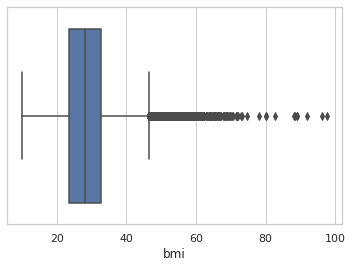

In [ ]:
#Checking if the BMI variable has an outlier and treat it accordingly. 
sns.set(style="whitegrid")

ax = sns.boxplot(x=input_data["bmi"])

plt.show()


It is evident that most of the values are outside of the 75th percentile , so Outlier Treatment will lead to more Bias in the model prediction. Hence, we let the Variable be, without outlier treatment. 

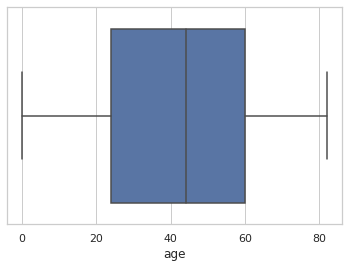

In [ ]:
#Checking if the Age variable has an outlier and treat it accordingly. 
sns.set(style="whitegrid")

ax = sns.boxplot(x=input_data["age"])

plt.show()



From the Boxplot, it is evident that the Age Variable doesn't have any outliers. 

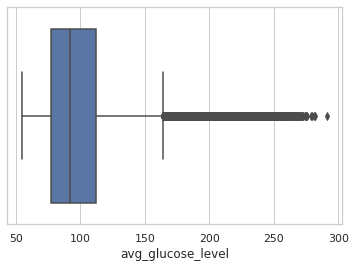

In [ ]:
#Checking if the Glucose Level variable has an outlier and treat it accordingly. 
sns.set(style="whitegrid")

ax = sns.boxplot(x=input_data["avg_glucose_level"])

plt.show()

It is evident that most of the values are outside of the 75th percentile , so Outlier Treatment will lead to more Bias in the model prediction. Hence, we let the Variable be, without outlier treatment. 

The next step would be to create dummy variables for categorical variables and change the datatype of Object into Float Datatypes. 

The Marital Status field has two levels - "Yes" and "No". It needs to be converted into float datatype from its current object datatype

In [ ]:
input_data['ever_married'] = input_data['ever_married'].replace('No', 0)

In [ ]:
input_data['ever_married'] = input_data['ever_married'].replace('Yes', 1)

The Residence Type field has two levels - "Rural" and "Urban". It needs to be converted into float datatype from its current object datatype

In [ ]:
input_data['Residence_type'] = input_data['Residence_type'].replace('Rural', 0)

In [ ]:
input_data['Residence_type'] = input_data['Residence_type'].replace('Urban', 1)

The Variables -Gender, Smoking Status and Work Type have more than two levels, hence dummy variables need to be created for these variables. 

In [ ]:
#Dummy Variable Creation for Smoking Status 
dummies = pd.get_dummies(input_data['smoking_status']).rename(columns=lambda x: 'smoking_status_' + str(x))
df = pd.concat([input_data, dummies], axis=1)

In [ ]:
dummies_2 = pd.get_dummies(input_data['gender']).rename(columns=lambda x: 'gender_' + str(x))
df = pd.concat([df, dummies_2], axis=1)

In [ ]:
#Dummy Variable Creation for Work Type
dummies_1 = pd.get_dummies(input_data['work_type']).rename(columns=lambda x: 'work_type' + str(x))
df = pd.concat([df, dummies_1], axis=1)

 Next step is to remove the unwanted variables to overcome the Dummy Variable Trap

In [ ]:
df.drop('work_type', axis=1, inplace=True)

df.drop('smoking_status', axis=1, inplace=True)

df.drop('gender', axis=1, inplace=True)




In [ ]:
print(df)

        age  hypertension  heart_disease  ever_married  Residence_type  \
0       3.0             0              0             0               0   
1      58.0             1              0             1               1   
2       8.0             0              0             0               1   
3      70.0             0              0             1               0   
4      14.0             0              0             0               0   
...     ...           ...            ...           ...             ...   
61996  20.0             0              0             0               0   
61997  61.0             0              0             1               0   
61998  79.0             0              0             1               0   
61999  55.0             0              0             1               0   
62000  38.0             0              0             0               0   

       avg_glucose_level   bmi  stroke  smoking_status_formerly smoked  \
0                  95.12  18.0     0.

In [ ]:
df.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
work_typeGovt_job                   uint8
work_typeNever_worked               uint8
work_typePrivate                    uint8
work_typeSelf-employed              uint8
work_typechildren                   uint8
dtype: object

Next step is to run a Machine Learning Model to check for probabilistic outcomes of a patient getting a stroke or not. 




In [ ]:
#Loading the necessary packages
#Load the Scikit learn Packages for Logistic Regression Model
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
#Split the data into trainng and testing dataset
train, test = train_test_split(df, test_size=0.2, shuffle = False)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


#Splitting the Training Dataset further to Dataset for Model Building and Validation Dataset
train_df, val_df = train_test_split(train, test_size=0.2, shuffle = False)
train_df = train_df.reset_index(drop=True)
val_df = train_df.reset_index(drop=True)

In [ ]:
#Creating a seperate dataframe containing the target variable of the training data
Y = train_df['stroke']
train_df.drop('stroke', axis=1, inplace=True)

#Creating a seperate dataframe containing the target variable of the validation data
Y_val = val_df['stroke']
val_df.drop('stroke', axis=1, inplace=True)

In [ ]:
#Check for Datatypes of input data to model
train_df.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
work_typeGovt_job                   uint8
work_typeNever_worked               uint8
work_typePrivate                    uint8
work_typeSelf-employed              uint8
work_typechildren                   uint8
dtype: object

In [ ]:
#Building the logistic Regression Model
logreg = LogisticRegression()
Y=Y.astype('int')
logreg.fit(train_df, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(val_df)
y_pred_proba = logreg.predict_proba(val_df)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_val, y_pred))

LogisticRegression accuracy is 0.982


In [ ]:
cm1 = confusion_matrix(y_pred,Y_val)
print(cm1)


[[38980   700]
 [    0     0]]


From the Confusion Matrix , the Patients who had a stroke were not predicted properly because of imbalanced class in the dataset, despite the accuracy being high. Hence, using sensitivity and specificity as the Metrics for calculating Model Performance

In [ ]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9823588709677419
Specificity :  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in long_scalars



Performing Exploratory Data Analysis :

1) Checking for the Percentage of people who stroke vis a vis people who didn't have an episode of stroke.

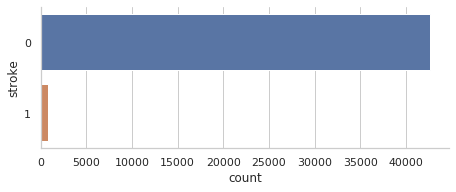

In [ ]:
ax = sns.catplot(y="stroke", kind="count", data=train_data, height=2.6, aspect=2.5, orient='h', label = 'stroke')

Performing a Gender vs Stroke Incident Analysis

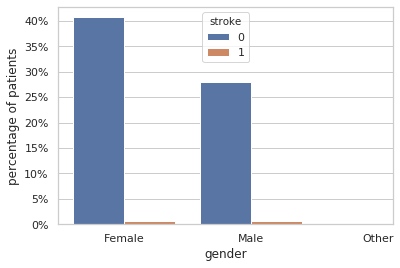

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of patients"):
    ratios = pd.DataFrame()
    g = train_data.groupby(feature)["stroke"].value_counts().to_frame()
    g = g.rename({"stroke": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='stroke', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='stroke', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("gender")

From the above graph, it shows that, of the patients there were about 42% who didn't get a stroke as opposed to 27% men who didn't get stroke. 

Performing a Heart Disease vs Stroke Analysis

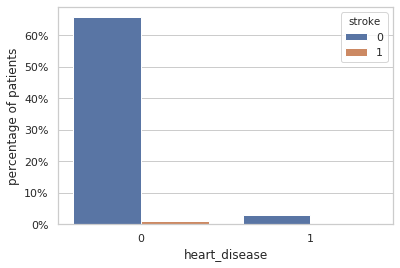

In [ ]:

def barplot_percentages(feature, orient='v', axis_name="percentage of patients"):
    ratios = pd.DataFrame()
    g = train_data.groupby(feature)["stroke"].value_counts().to_frame()
    g = g.rename({"stroke": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='stroke', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='stroke', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("heart_disease")

From the above graph, we infer that, of the people who had a heart attack, they didn't get a stroke and 70% of people who didn't have a heart attack didn't get any stroke episode. 

Performing a Hypertension vs Stroke Analysis

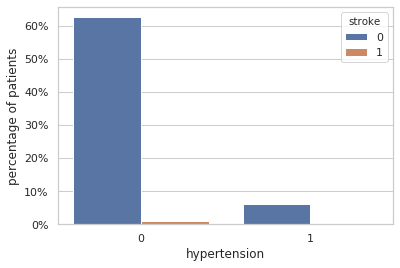

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of patients"):
    ratios = pd.DataFrame()
    g = train_data.groupby(feature)["stroke"].value_counts().to_frame()
    g = g.rename({"stroke": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='stroke', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='stroke', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("hypertension")

Nearly 5 % of people had hypertension who didn't have any traces of a stroke

Performing a Residence Type vs Stroke Analysis

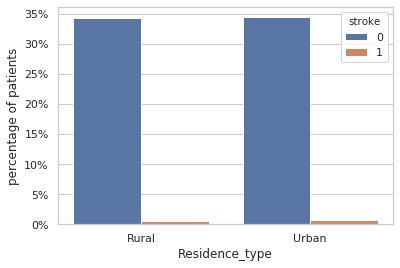

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of patients"):
    ratios = pd.DataFrame()
    g = train_data.groupby(feature)["stroke"].value_counts().to_frame()
    g = g.rename({"stroke": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='stroke', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='stroke', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("Residence_type")

An equal proportion of patients from urban and rural area did not have stroke and did have stroke

Doing a Variable Importance Plot Analysis

Text(0.5, 0, 'Relative Feature Importance')

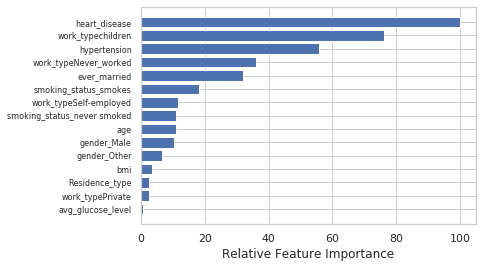

In [ ]:
feature_importance = abs(log_reg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(train_df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')


Handling Imbalanced Data - Up Sampling the Minority Class

In [ ]:

from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.stroke==0]
df_minority = df[df.stroke==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=42617,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()

1.0    42617
0.0    42617
Name: stroke, dtype: int64

Running a Logistic Regression model with the treated data


In [ ]:
#Split the data into trainng and testing dataset
train, test = train_test_split(df_upsampled, test_size=0.2, shuffle = False)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


#Splitting the Training Dataset further to Dataset for Model Building and Validation Dataset
train_df, val_df = train_test_split(train, test_size=0.2, shuffle = False)
train_df = train_df.reset_index(drop=True)
val_df = train_df.reset_index(drop=True)

In [ ]:
#Creating a seperate dataframe containing the target variable of the training data
Y = train_df['stroke']
train_df.drop('stroke', axis=1, inplace=True)

#Creating a seperate dataframe containing the target variable of the validation data
Y_val = val_df['stroke']
val_df.drop('stroke', axis=1, inplace=True)

In [ ]:
#Building the logistic Regression Model
logreg = LogisticRegression()
Y=Y.astype('int')
logreg.fit(train_df, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(val_df)
y_pred_proba = logreg.predict_proba(val_df)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_val, y_pred))

LogisticRegression accuracy is 0.814


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm1 = confusion_matrix(y_pred,Y_val)

In [ ]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.8531702859132251
Specificity :  0.6034221860086136


Using Second ML Algorithm - Decision Trees

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [ ]:
#Split the data into trainng and testing dataset
train, test = train_test_split(df_upsampled, test_size=0.2, shuffle = False)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


#Splitting the Training Dataset further to Dataset for Model Building and Validation Dataset
train_df, val_df = train_test_split(train, test_size=0.2, shuffle = False)
train_df = train_df.reset_index(drop=True)
val_df = train_df.reset_index(drop=True)

In [ ]:
#Creating a seperate dataframe containing the target variable of the training data
Y = train_df['stroke']
train_df.drop('stroke', axis=1, inplace=True)

#Creating a seperate dataframe containing the target variable of the validation data
Y_val = val_df['stroke']
Y_val=Y_val.astype('int')
val_df.drop('stroke', axis=1, inplace=True)


In [ ]:
dt = DecisionTreeClassifier()
Y=Y.astype('int')
dt.fit(train_df, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt.predict(val_df)
y_pred_proba = dt.predict_proba(val_df)
print(dt.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_val, y_pred))

DecisionTreeClassifier accuracy is 1.000


In [ ]:
cm1 = confusion_matrix(y_pred,Y_val)

In [ ]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  1.0
Specificity :  1.0


Use the Third ML Algorithm - Neural Networks

In [ ]:
#Split the data into trainng and testing dataset
train, test = train_test_split(df_upsampled, test_size=0.2, shuffle = False)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


#Splitting the Training Dataset further to Dataset for Model Building and Validation Dataset
train_df, val_df = train_test_split(train, test_size=0.2, shuffle = False)
train_df = train_df.reset_index(drop=True)
val_df = train_df.reset_index(drop=True)

In [ ]:
#Creating a seperate dataframe containing the target variable of the training data
Y = train_df['stroke']
train_df.drop('stroke', axis=1, inplace=True)

#Creating a seperate dataframe containing the target variable of the validation data
Y_val = val_df['stroke']
val_df.drop('stroke', axis=1, inplace=True)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# load the Neural Networks Layer
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(train_df, Y, epochs=10, batch_size=1)




Epoch 1/10
54549/54549 [==============================] - 66s 1ms/step - loss: 0.4276 - acc: 0.7948
Epoch 2/10
54549/54549 [==============================] - 66s 1ms/step - loss: 0.3904 - acc: 0.8049
Epoch 3/10
54549/54549 [==============================] - 64s 1ms/step - loss: 0.3851 - acc: 0.8079
Epoch 4/10
54549/54549 [==============================] - 64s 1ms/step - loss: 0.3826 - acc: 0.8099
Epoch 5/10
54549/54549 [==============================] - 65s 1ms/step - loss: 0.3806 - acc: 0.8105
Epoch 6/10
54549/54549 [==============================] - 65s 1ms/step - loss: 0.3795 - acc: 0.8103
Epoch 7/10
54549/54549 [==============================] - 65s 1ms/step - loss: 0.3777 - acc: 0.8098
Epoch 8/10
54549/54549 [==============================] - 64s 1ms/step - loss: 0.3808 - acc: 0.8110
Epoch 9/10
54549/54549 [==============================] - 65s 1ms/step - loss: 0.3788 - acc: 0.8106
Epoch 10/10
54549/54549 [==============================] - 66s 1ms/step - loss: 0.3781 - acc: 0.8115

In [ ]:
y_pred = model.predict_classes(val_df)


In [ ]:
Y_val=Y_val.astype('int')

In [ ]:
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_val, y_pred))

Sequential accuracy is 0.817


In [ ]:
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.8730394622525035
Specificity :  0.590047174174452


Using ML Algorithm 4 - Random Forest with 100 Trees

In [ ]:
#Split the data into trainng and testing dataset
train, test = train_test_split(df_upsampled, test_size=0.2, shuffle = False)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


#Splitting the Training Dataset further to Dataset for Model Building and Validation Dataset
train_df, val_df = train_test_split(train, test_size=0.2, shuffle = False)
train_df = train_df.reset_index(drop=True)
val_df = train_df.reset_index(drop=True)

In [ ]:
#Creating a seperate dataframe containing the target variable of the training data
Y = train_df['stroke']
train_df.drop('stroke', axis=1, inplace=True)

#Creating a seperate dataframe containing the target variable of the validation data
Y_val = val_df['stroke']
Y_val=Y_val.astype('int')
val_df.drop('stroke', axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
Y=Y.astype('int')
# Train the model on training data
rf.fit(train_df, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict(val_df)

In [ ]:
print(rf.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_val, y_pred))

RandomForestClassifier accuracy is 1.000


In [ ]:
cm1 = confusion_matrix(y_pred,Y_val)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  1.0
Specificity :  1.0
